<a href="https://colab.research.google.com/github/virf96/Neural-Networks/blob/main/Redes_Ejercicio_2_resuelto_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = h5py.File("/content/drive/MyDrive/datasets/train_signs.h5","r")
test= h5py.File("/content/drive/MyDrive/datasets/test_signs.h5","r")

In [ ]:
train.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [ ]:
xt = np.array(train['train_set_x'])
yt = np.array(train['train_set_y'])
xv = np.array(test['test_set_x'])
yv = np.array(test['test_set_y'])

In [ ]:
np.unique(yt) ## Clases del dataset

array([0, 1, 2, 3, 4, 5])

2


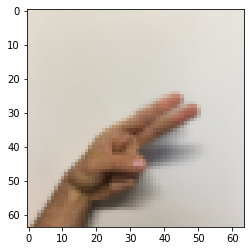

In [ ]:
index = 2
print(yt[index])
plt.imshow(xt[index])

### Pre-procesamiento

In [ ]:
xt_es = xt/255
xv_es = xv/255

In [ ]:
np.unique(yt)

array([0, 1, 2, 3, 4, 5])

#### One-Hot Encoding

In [ ]:
yt

array([5, 0, 2, ..., 2, 4, 5])

In [ ]:
yt_OH = np.eye(6)[yt]
yv_OH = np.eye(6)[yv]

### CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2

In [ ]:
xt_es.shape

(1080, 64, 64, 3)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(64,64,3))) ## las dimensiones de la imagen, o las dimensiones de cada ejemplo
model.add(Conv2D(filters= 8 , kernel_size=(3,3), padding="same", activation = "tanh", name = "conv1"))
model.add(MaxPool2D(pool_size=(2,2))) ## reducimos la imagen a la mitad de su tamaño 
model.add(Conv2D(filters= 16 , kernel_size=(3,3), padding="same", activation = "tanh", name="conv2" ))
model.add(MaxPool2D(pool_size=(2,2))) ## reducimos la imagen a la mitad de su tamaño 
model.add(Conv2D(filters= 32 , kernel_size=(3,3), padding="same", activation = "tanh" ,name="conv3" ))
model.add(MaxPool2D(pool_size=(2,2))) ## reducimos la imagen a la mitad de su tamaño
model.add(Flatten()) ## convetimos un tensor de cualesquiera dimensiones a un vector 
model.add(Dropout(.3))
model.add(Dense(units=128, activation ="tanh" ))
model.add(Dropout(.3))
model.add(Dense(units=64, activation ="tanh"))
model.add(Dropout(.25))

model.add(Dense(6, activation="softmax")) ## capa de salida 

model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(.001,), metrics= ["accuracy"])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 64, 64, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

#### Numero de parametros por capa

1.conv1(f=8, k=(3,3)) = 3x3x3x8 + 8  = 224\
2. conv2(f=16, k=(3,3)) = 3x3x8x16 + 16 = 1168 \
3. Conv2(f=32, k=(3,3)) = 3x3x16x32 + 32 =  4640   \
\
4. Flatten((8,8,32)) = 8x8x32 = 2048 Es el tamaño del vector \
5. Dense(128) = 2048x128 + 128 = 262272  \
6. Dense(64) = 128x64 + 64 = 8256 \
7. Dense(6) 64x6+ 6 = 390


In [ ]:
xt.shape

(1080, 64, 64, 3)

In [ ]:
history = model.fit(xt_es,yt_OH, epochs= 300, batch_size = 256, validation_data=(xv_es,yv_OH))

Epoch 1/300
5/5 [==============================] - 4s 523ms/step - loss: 2.0606 - accuracy: 0.1852 - val_loss: 1.9227 - val_accuracy: 0.1667
Epoch 2/300
5/5 [==============================] - 2s 471ms/step - loss: 1.8743 - accuracy: 0.2074 - val_loss: 1.7448 - val_accuracy: 0.3500
Epoch 3/300
5/5 [==============================] - 2s 472ms/step - loss: 1.7227 - accuracy: 0.2556 - val_loss: 1.6921 - val_accuracy: 0.2000
Epoch 4/300
5/5 [==============================] - 3s 490ms/step - loss: 1.6176 - accuracy: 0.3343 - val_loss: 1.5599 - val_accuracy: 0.3500
Epoch 5/300
5/5 [==============================] - 3s 470ms/step - loss: 1.5085 - accuracy: 0.4407 - val_loss: 1.4287 - val_accuracy: 0.4917
Epoch 6/300
5/5 [==============================] - 2s 469ms/step - loss: 1.3706 - accuracy: 0.5231 - val_loss: 1.3003 - val_accuracy: 0.5667
Epoch 7/300
5/5 [==============================] - 2s 477ms/step - loss: 1.2517 - accuracy: 0.5769 - val_loss: 1.1809 - val_accuracy: 0.6417
Epoch 8/300
5

### Funcion de perdida

In [ ]:
fig = go.Figure()
fig.add_trace( go.Scatter(x= np.arange(len(history.history["loss"])), y=history.history["loss"], mode="lines"))
fig.add_trace(go.Scatter(x= np.arange(len(history.history["val_loss"])), y=history.history["val_loss"], mode="lines"))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace( go.Scatter(x= np.arange(len(history.history["accuracy"])), y=history.history["accuracy"], mode="lines"))
fig.add_trace(go.Scatter(x= np.arange(len(history.history["val_accuracy"])), y=history.history["val_accuracy"], mode="lines"))
fig.update_layout(dict(title="Accuracy"))
fig.show()

In [ ]:
xv.shape

(120, 64, 64, 3)

4


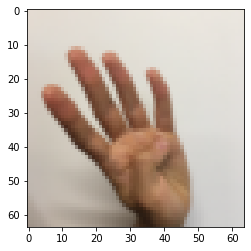

In [ ]:
index = 56
print(np.squeeze(np.argmax(model.predict(xv_es[index:index+1]),axis=1)))
plt.imshow(xv[index])

#### Que esta aprendieno la red

In [ ]:
x = model.layers[0](xv_es[index:index+1])

In [ ]:
x.shape

TensorShape([1, 64, 64, 8])

In [54]:
x[0,:,:,5:9]

<tf.Tensor: shape=(32, 32, 4), dtype=float32, numpy=
array([[[ 4.45087850e-01, -2.76099294e-01, -4.51472700e-01,
          2.98639131e-03],
        [ 4.09437567e-01, -3.26402605e-01, -6.12972617e-01,
         -1.13017112e-01],
        [ 4.76822078e-01, -3.04149687e-01, -6.06035590e-01,
         -6.63687289e-02],
        ...,
        [ 4.93166089e-01, -3.17170769e-01, -6.28868997e-01,
         -7.26510510e-02],
        [ 4.43218440e-01, -3.09013426e-01, -6.26361191e-01,
         -2.29592137e-02],
        [ 3.59654933e-01, -1.96264833e-01, -4.13564384e-01,
         -8.01454261e-02]],

       [[ 6.24881327e-01, -5.74820817e-01,  1.83627695e-01,
         -5.99959418e-02],
        [ 4.59118426e-01, -6.01376474e-01,  2.39340633e-01,
         -2.07766667e-01],
        [ 4.75064993e-01, -5.48686147e-01,  3.20823789e-01,
         -1.20376378e-01],
        ...,
        [ 4.94594783e-01, -5.70776582e-01,  3.16778630e-01,
         -1.34529382e-01],
        [ 3.98465633e-01, -5.24858177e-01,  3.558

In [ ]:
plt.imshow(x[0,:,:,0:34])

In [51]:
model.layers

In [52]:
x = model.layers[1](x)
x = model.layers[2](x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


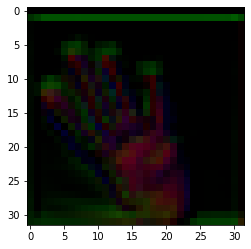

In [65]:
plt.imshow(x[0,:,:,6:9])

In [66]:
x = model.layers[3](x)
x = model.layers[4](x)

In [70]:
x[0,:,:,5:9]

<tf.Tensor: shape=(16, 16, 4), dtype=float32, numpy=
array([[[-0.00786096, -0.05719412,  0.34935582,  0.21025422],
        [-0.23356798,  0.00243189,  0.13840275,  0.079464  ],
        [-0.2261704 , -0.0332532 ,  0.14355433,  0.02054595],
        ...,
        [-0.23791221, -0.01801031,  0.17032334,  0.05218027],
        [-0.25458238, -0.18678112,  0.02785623, -0.17071089],
        [-0.34162417, -0.13301261, -0.20126848, -0.31739143]],

       [[ 0.07725932,  0.08589829,  0.16790134,  0.10420328],
        [-0.1193891 , -0.03869412, -0.05235752, -0.04977622],
        [-0.01898445, -0.05150182, -0.11454973, -0.1493229 ],
        ...,
        [-0.01255499,  0.03647687, -0.07181948, -0.03011087],
        [-0.0798143 , -0.13450556, -0.15901111, -0.23022915],
        [-0.10483187, -0.27239558, -0.35473073, -0.00219685]],

       [[ 0.02335301,  0.11027377,  0.09353234, -0.03971014],
        [-0.12360296, -0.19178644, -0.10707227, -0.12475962],
        [ 0.03059057, -0.35910544, -0.32907137, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


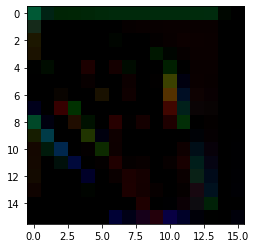

In [82]:
plt.imshow(x[0,:,:,6:9])